<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/08_nlp_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-11-02 11:26:01--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-11-02 11:26:01 (71.9 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [3]:
from helper_functions import unzip_data,plot_loss_curves,compare_historys,create_tensorboard_callback

In [4]:
# Get the Dataset from kaggle NLP with Disaster Tweets
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2025-11-02 11:26:22--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2025-11-02 11:26:23 (74.5 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

In [6]:
# Become One with Dataset (Visualize)
import pandas as pd
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df['text'][1]

'Forest fire near La Ronge Sask. Canada'

In [8]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [9]:
# Shuffle Dataset
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()


,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [10]:
# What does Test Dataset Look like
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
# How many examples of each classes
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [12]:
# How many Total Samples
len(train_df),len(test_df)

(7613, 3263)

# **Visualize some random training examples**

In [13]:
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
    _,text,target=row
    print(f'Target : {target} \n ',"(real disaster)" if target>0 else "not real disaster")
    print(f'Text : \n {text}')
    print('---\n')

Target : 0 
  not real disaster
Text : 
 @JaydenNotJared I can't help it. Hope you're ok. Text me if you need to talk. Sending hugs your way. PS no bleeding to death allowed
---

Target : 0 
  not real disaster
Text : 
 Canberra's first Mr Fluffy homes demolition schedule released  http://t.co/B77T2QxDCS
---

Target : 1 
  (real disaster)
Text : 
 Learning from the Legacy of a Catastrophic Eruption http://t.co/25sY9Y295L via @newyorker
---

Target : 0 
  not real disaster
Text : 
 @ChristyCroley Not in the works yet. Did you see the new Vela Short in Blaze? http://t.co/Q8rEoEVluE
---

Target : 1 
  (real disaster)
Text : 
 RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG
---



In [14]:
#Splitting data into Train and Validation
from sklearn.model_selection import train_test_split

train_sentances,val_sentances,train_labels,val_labels=train_test_split(
                                                      train_df_shuffled['text'].to_numpy(),
                                                      train_df_shuffled['target'].to_numpy(),
                                                      test_size=0.1,
                                                      random_state=42)

In [15]:
# Check lengths
len(train_sentances),len(val_sentances),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

# **Convert Text into Numbers**

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(
                                  max_tokens=10000, # Set max_tokens to a value
                                  standardize='lower_and_strip_punctuation',
                                  split='whitespace',
                                  ngrams=None,
                                  output_mode='int',
                                  output_sequence_length=None,
                                  pad_to_max_tokens=True,
                                   )

In [17]:
max_vocab_length=100   # Max number of words to have in vocabulary
max_length=15  # Max length our sequence will be
text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  standardize='lower_and_strip_punctuation',
                                  split='whitespace',
                                  ngrams=None,
                                  output_mode='int',
                                  output_sequence_length=max_vocab_length,
                                  pad_to_max_tokens=True)

In [18]:
# Fit the Text Vectorizer
text_vectorizer.adapt(train_sentances)

In [19]:
# Create a sample sentance and tokenize it
sample_sentance=random.choice(train_sentances)
print(f' The Original Sentance \n {sample_sentance} \n The Text Vectorized Version \n')
text_vectorizer([sample_sentance])

 The Original Sentance 
 5000 year old ring fort to be demolished http://t.co/1PxpoqKTjo 
 The Text Vectorized Version 



<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[ 1,  1,  1,  1,  1,  5, 21,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])>

In [20]:
# Get uniqe words in vocab
words_in_vocab=text_vectorizer.get_vocabulary()
top_5_words=words_in_vocab[:5]
bottom_5_words=words_in_vocab[-5:]
print(f'The Number of words in vocab are : {len(words_in_vocab)}')
print(f'The Five most common words in vocab are : {top_5_words}')
print(f'The Five least words in vocab are : {bottom_5_words}')

The Number of words in vocab are : 100
The Five most common words in vocab are : ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
The Five least words in vocab are : [np.str_('buildings'), np.str_('rt'), np.str_('first'), np.str_('cant'), np.str_('see')]


In [21]:
# Creating a embedding layer that turns text vectorized into the embeding vectors
from tensorflow.keras.layers import Embedding

embedding=Embedding(input_dim=max_vocab_length,
                    output_dim=128,
                    )

In [22]:
# Get Random Sentance from trainning set
random_sentance=random.choice(train_sentances)
print(f'Original Text \n {random_sentance}\n')
sample_embedding=embedding(text_vectorizer([random_sentance]))
sample_embedding

Original Text 
 Hollywood Movie About Trapped Miners Released in Chile http://t.co/EXQKmlg4NJ



<tf.Tensor: shape=(1, 100, 128), dtype=float32, numpy=
array([[[-0.0361564 , -0.017309  , -0.04950122, ..., -0.04079864,
          0.01176101, -0.01786395],
        [-0.0361564 , -0.017309  , -0.04950122, ..., -0.04079864,
          0.01176101, -0.01786395],
        [-0.03286214, -0.00265544,  0.01945424, ..., -0.02106191,
          0.02881252,  0.01582897],
        ...,
        [ 0.00080607, -0.00342504, -0.01461266, ...,  0.04479686,
         -0.02325503,  0.04793546],
        [ 0.00080607, -0.00342504, -0.01461266, ...,  0.04479686,
         -0.02325503,  0.04793546],
        [ 0.00080607, -0.00342504, -0.01461266, ...,  0.04479686,
         -0.02325503,  0.04793546]]], dtype=float32)>

# ***Lets Now Create our Baseline Model***
its common to use ML model first or non DL model and then switch to DL model

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0=Pipeline([
    ('tfid',TfidfVectorizer()),
    ('clf',MultinomialNB()),
])

model_0.fit(train_sentances,train_labels)
baseline_score=model_0.score(val_sentances,val_labels)

print(f'Our Baseline Model Acheives Accuracy of : {baseline_score*100:.2f}')

Our Baseline Model Acheives Accuracy of : 79.27


In [24]:
# Model Predictions
baseline_preds=model_0.predict(val_sentances)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# **Creating an evaluation function**

In [25]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support


def calculate_results(y_true,y_pred):
  model_accuracy=accuracy_score(y_true=y_true,y_pred=y_pred)
  model_precission,model_recall,model_f1,_=precision_recall_fscore_support(y_true=y_true,y_pred=y_pred,average='weighted')

  model_results={
     "accuracy":model_accuracy,
     "precsion":model_precission,
     "recall":model_recall,
     'f1_score':model_f1
  }
  return model_results

In [26]:
# Get Baseline Results
baseline_results=calculate_results(y_true=val_labels,y_pred=baseline_preds)

baseline_results

{'accuracy': 0.7926509186351706,
 'precsion': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

# **Model1 : Feed Forward Neural Network ( Dense Model)**

In [27]:
from helper_functions import create_tensorboard_callback
from tensorflow.keras import layers

In [28]:
SAVE_DIR="ModelLogs"

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x) # Add this layer to reduce dimensions
outputs=layers.Dense(1,activation='sigmoid')(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_Dense")
model_1.summary()

Model: "model_1_Dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_1_history=model_1.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels),callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name='model_1_dense')])

Saving TensorBoard log files to: ModelLogs/model_1_dense/20251102-112624
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5811 - loss: 0.6797 - val_accuracy: 0.6115 - val_loss: 0.6789
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5905 - loss: 0.6723 - val_accuracy: 0.5486 - val_loss: 0.6726
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6074 - loss: 0.6551 - val_accuracy: 0.5971 - val_loss: 0.6477
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6518 - loss: 0.6283 - val_accuracy: 0.6391 - val_loss: 0.6274
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6662 - loss: 0.6164 - val_accuracy: 0.5906 - val_loss: 0.6662


In [30]:
model_1.evaluate(val_sentances,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5755 - loss: 0.6924


[0.6661814451217651, 0.5905511975288391]

In [31]:
model_1_predict_probs=model_1.predict(val_sentances)
model_1_predict_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.35540456],
       [0.46820104],
       [0.53197885],
       [0.1935655 ],
       [0.27964243],
       [0.43540668],
       [0.5134774 ],
       [0.4679424 ],
       [0.4706427 ],
       [0.15987116],
       [0.3163759 ],
       [0.34247923],
       [0.3972177 ],
       [0.3015984 ],
       [0.43217766],
       [0.31087905],
       [0.17054641],
       [0.2439019 ],
       [0.25285357],
       [0.33043236],
       [0.1560461 ],
       [0.08456208],
       [0.2506523 ],
       [0.27947202],
       [0.32895985],
       [0.42772186],
       [0.07923033],
       [0.34748477],
       [0.14869167],
       [0.18048573],
       [0.27692834],
       [0.2779722 ],
       [0.36143637],
       [0.29812878],
       [0.3466484 ],
       [0.09269111],
       [0.43320566],
       [0.15565088],
       [0.15594643],
       [0.48414755],
       [0.21700633],
       [0.41682228],
       [0.25649658],
       [0.33624673],
       [0.22867838],
       [0.3880396 ],
       [0.27616367],
       [0.550

In [32]:
model_1_predict_probs.shape

(762, 1)

In [33]:
model_1_predict_probs[0]

array([0.35540456], dtype=float32)

In [34]:
# Make the preictions comaparable with the actaul labels
model_1_predict_probs=tf.squeeze(tf.round(model_1_predict_probs))
model_1_predict_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [35]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

# ***Calculate Model Results***

In [36]:
model_1_results=calculate_results(y_true=val_labels,y_pred=model_1_predict_probs)
model_1_results

{'accuracy': 0.5905511811023622,
 'precsion': 0.6971122921660795,
 'recall': 0.5905511811023622,
 'f1_score': 0.4929683077871494}

In [37]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(baseline_results.values()))

array([False, False, False, False])

# ***Lets Visualize the embedding that Model learned using Tensorflow Projector***

In [38]:
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(100,
 ['',
  '[UNK]',
  np.str_('the'),
  np.str_('a'),
  np.str_('in'),
  np.str_('to'),
  np.str_('of'),
  np.str_('and'),
  np.str_('i'),
  np.str_('is')])

In [39]:
model_1.summary()

Model: "model_1_Dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,789 (151.52 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,860 (101.02 KB)

In [40]:
embed_weights=model_1.get_layer('embedding').get_weights()[0]
embed_weights,print(embed_weights.shape)

(100, 128)


(array([[ 0.03925506, -0.03921656,  0.03727458, ..., -0.018583  ,
         -0.03945705,  0.0719306 ],
        [-0.23612301,  0.16465242, -0.23603426, ...,  0.13003504,
          0.2039497 , -0.20858379],
        [ 0.21285927, -0.13507663,  0.19242306, ..., -0.12886123,
         -0.15422742,  0.14054541],
        ...,
        [-0.0920757 ,  0.03674228, -0.00483882, ...,  0.05267381,
          0.07685848, -0.03964233],
        [ 0.38394365, -0.2996646 ,  0.29190728, ..., -0.33020222,
         -0.2841337 ,  0.30969104],
        [ 0.3067283 , -0.290138  ,  0.3019751 , ..., -0.26294866,
         -0.29712918,  0.30046433]], dtype=float32),
 None)

Write the weights to disk. To use the Embedding Projector, you will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).  This code is from the tensorflow documentation Here[https://www.tensorflow.org/text/guide/word_embeddings]

In [41]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [42]:
# After this download step use projector tensorflow to visualzize it
"""
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass
"""


"\ntry:\n  from google.colab import files\n  files.download('vectors.tsv')\n  files.download('metadata.tsv')\nexcept Exception:\n  pass\n"

# ***MODEL2 =  LSTM [LONG SHORT TERM MEMORY]***

In [43]:
from tensorflow.keras import layers


In [44]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.LSTM(64,return_sequences=True)(x)
x=layers.LSTM(64)(x)
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_2=tf.keras.Model(inputs,outputs)

In [45]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [46]:
model_2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,457 (388.50 KB)

 Trainable params: 99,457 (388.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_2_history=model_2.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels),callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_LSTM")])

Saving TensorBoard log files to: ModelLogs/model_2_LSTM/20251102-112650
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.5735 - loss: 0.6845 - val_accuracy: 0.5433 - val_loss: 0.6903
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 43s 122ms/step - accuracy: 0.5830 - loss: 0.6822 - val_accuracy: 0.5433 - val_loss: 0.6905
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 0.5805 - loss: 0.6806 - val_accuracy: 0.5433 - val_loss: 0.6894
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.5784 - loss: 0.6820 - val_accuracy: 0.5433 - val_loss: 0.6915
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 114ms/step - accuracy: 0.5726 - loss: 0.6828 - val_accuracy: 0.5433 - val_loss: 0.6925


In [48]:
model_2_pred_probs=model_2.predict(val_sentances)
model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


array([[0.4179268],
       [0.4179268],
       [0.4179268],
       [0.4179268],
       [0.4179268],
       [0.4179268],
       [0.4179268],
       [0.4179268],
       [0.4179268],
       [0.4179268]], dtype=float32)

In [49]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [50]:
model_2_results=calculate_results(y_true=val_labels,y_pred=model_2_preds)
model_2_results

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.5433070866141733,
 'precsion': 0.29518259036518074,
 'recall': 0.5433070866141733,
 'f1_score': 0.38253254057528524}

In [51]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precsion': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

# ***As it is clear our baseline is more accurate***

# ***Model_3 GRU (Gated Recurrent Unit)***

In [52]:
from tensorflow.keras import layers

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GRU(64)(x)
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_3=tf.keras.Model(inputs,outputs)


In [53]:
model_3.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,273 (212.00 KB)

 Trainable params: 54,273 (212.00 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [55]:
model_3_history=model_3.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels),callbacks=[create_tensorboard_callback(SAVE_DIR,"model_GRU")])

Saving TensorBoard log files to: ModelLogs/model_GRU/20251102-112918
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.5710 - loss: 0.6834 - val_accuracy: 0.5433 - val_loss: 0.6910
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.5681 - loss: 0.6848 - val_accuracy: 0.5433 - val_loss: 0.6903
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.5837 - loss: 0.6810 - val_accuracy: 0.5433 - val_loss: 0.6895
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.5642 - loss: 0.6855 - val_accuracy: 0.5433 - val_loss: 0.6902
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.5665 - loss: 0.6845 - val_accuracy: 0.5433 - val_loss: 0.6902


In [56]:
model_3_pred_probs=model_3.predict(val_sentances)
model_3_pred_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.4363714 ],
       [0.436

In [57]:
model_3_pred=tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [58]:
model_3_results=calculate_results(val_labels,model_3_pred)
model_3_results

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.5433070866141733,
 'precsion': 0.29518259036518074,
 'recall': 0.5433070866141733,
 'f1_score': 0.38253254057528524}

# ***GRU Does not beat the baseline***
lets try something else

# ***Model_4 Bidirectional Model***

In [59]:
from tensorflow.keras import layers

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_4=tf.keras.Model(inputs,outputs)

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_4.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,745 (436.50 KB)

 Trainable params: 111,745 (436.50 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model_4_history=model_4.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels),callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_bi_directional")])

Saving TensorBoard log files to: ModelLogs/model_4_bi_directional/20251102-113049
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.6910 - loss: 0.5933 - val_accuracy: 0.6837 - val_loss: 0.5964
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 114ms/step - accuracy: 0.7138 - loss: 0.5636 - val_accuracy: 0.6969 - val_loss: 0.5889
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 0.7216 - loss: 0.5605 - val_accuracy: 0.7008 - val_loss: 0.5845
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.7201 - loss: 0.5553 - val_accuracy: 0.6929 - val_loss: 0.5905
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.7282 - loss: 0.5461 - val_accuracy: 0.7100 - val_loss: 0.5822


In [61]:
model_4_pred_probs=model_4.predict(val_sentances)
model_4_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


array([[0.45956373],
       [0.775861  ],
       [0.6888394 ],
       [0.17584899],
       [0.2916817 ],
       [0.7595361 ],
       [0.74876064],
       [0.7541251 ],
       [0.83294237],
       [0.11174065]], dtype=float32)

In [62]:
model_4_pred=tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [63]:
model_4_results=calculate_results(val_labels,model_4_pred)

In [64]:
model_4_results

{'accuracy': 0.7099737532808399,
 'precsion': 0.7181388933379997,
 'recall': 0.7099737532808399,
 'f1_score': 0.7016976083782968}

# ***Still Not enough to beat the baseline***

**1D Convolutional Neural Network**

In [65]:
from tensorflow.keras import layers

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5,strides=1,activation='relu',padding='valid')(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_5=tf.keras.Model(inputs,outputs,name='Model_5_Conv1D')

In [66]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [67]:
model_5_history=model_5.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7023 - loss: 0.5794 - val_accuracy: 0.7008 - val_loss: 0.6276
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7229 - loss: 0.5570 - val_accuracy: 0.7100 - val_loss: 0.5794
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7334 - loss: 0.5450 - val_accuracy: 0.7126 - val_loss: 0.5810
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7383 - loss: 0.5320 - val_accuracy: 0.7113 - val_loss: 0.5996
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7325 - loss: 0.5383 - val_accuracy: 0.7126 - val_loss: 0.5860


In [68]:
model_5_pred_probs=model_5.predict(val_sentances)
model_5_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.48791945],
       [0.55736804],
       [0.53770065],
       [0.29591182],
       [0.3392197 ],
       [0.7546088 ],
       [0.92181754],
       [0.7421043 ],
       [0.7327018 ],
       [0.0633799 ]], dtype=float32)

In [69]:
model_5_pred=tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [70]:
model_5_results=calculate_results(val_labels,model_5_pred)
model_5_results

{'accuracy': 0.7125984251968503,
 'precsion': 0.7312039905567922,
 'recall': 0.7125984251968503,
 'f1_score': 0.6996345591325693}

# **Still does not beat the Baseline**
 Lets try a pretrained  model from tensorflow hub
 Using *USE: Unviversal Sentence Encoder*

In [71]:
import tensorflow_hub as hub
embed=hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [72]:
model_url='https://tfhub.dev/google/universal-sentence-encoder/4'

In [73]:
embed_samples=embed([sample_sentance])
print(embed_samples[0][:50])

tf.Tensor(
[-0.03999067 -0.03007977 -0.01435047 -0.02513048 -0.0837732  -0.0488284
  0.06599136 -0.0287408   0.00610671 -0.00085948  0.03902698  0.00582491
  0.00336716 -0.01930159  0.02785462 -0.02580531 -0.06370597 -0.0228982
  0.00659612  0.00568843 -0.02940279  0.0710561  -0.03596279  0.02211984
 -0.00968666 -0.01642159  0.02361794 -0.09062529 -0.00655283 -0.06289445
 -0.02894114 -0.01988692 -0.02296675 -0.00420985 -0.00177051  0.09578004
 -0.03795376  0.07779879 -0.08221048  0.03453932  0.01652105 -0.04882687
 -0.02773647 -0.02518154 -0.03942393 -0.05379936 -0.01342678  0.00948203
 -0.03308214 -0.06823813], shape=(50,), dtype=float32)


In [74]:
sentence_encoder_layer=hub.KerasLayer(model_url,input_shape=[],dtype=tf.string,trainable=False,
                                      name='Universal_sentence_enocoder')

In [75]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, Model
import numpy as np


# 1. Fix for TensorFlow-Hub + Keras 3 incompatibility

class USEEncoder(layers.Layer):
    def __init__(self, model_url, trainable=False, **kwargs):
        super().__init__(**kwargs)
        self.use_layer = hub.load(model_url)
        self.trainable = trainable

    def call(self, inputs):
        return self.use_layer(inputs)





In [76]:
# 2. Load the Universal Sentence Encoder

print("Loading Universal Sentence Encoder (this may take a few seconds)...")
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_layer = USEEncoder(model_url)




Loading Universal Sentence Encoder (this may take a few seconds)...


In [77]:
# Build Model
inputs = layers.Input(shape=(), dtype=tf.string, name="input_text")
embeddings = use_layer(inputs)
x = layers.Dense(256, activation="relu")(embeddings)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_6= Model(inputs=inputs, outputs=outputs, name="USE_Sentiment_Model")

In [78]:
# compile
model_6.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [79]:
# Train
print("\nTraining model...\n")
model_6_history=model_6.fit(train_sentances, train_labels, epochs=5, batch_size=2, verbose=1)


Training model...

Epoch 1/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.7718 - loss: 0.4885
Epoch 2/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.8333 - loss: 0.3888
Epoch 3/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.8470 - loss: 0.3528
Epoch 4/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.8773 - loss: 0.2841
Epoch 5/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.8973 - loss: 0.2417


In [80]:
#  Predict
print("\nEvaluating on validation sentences...\n")
model_6_predictions = model_6.predict(val_sentances)

for sent, pred in zip(val_sentances, model_6_predictions):
    label = "Positive 😊" if pred > 0.5 else "Negative 😞"
    print(f"Sentence: {sent}\nPrediction: {label} (score: {pred[0]:.4f})\n")


Evaluating on validation sentences...

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Sentence: DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5
Prediction: Negative 😞 (score: 0.2390)

Sentence: FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday
Prediction: Positive 😊 (score: 0.8517)

Sentence: Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj
Prediction: Positive 😊 (score: 1.0000)

Sentence: @camilacabello97 Internally and externally screaming
Prediction: Negative 😞 (score: 0.1938)

Sentence: Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov
Prediction: Positive 😊 (score: 0.6702)

Sentence: Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http:

In [81]:
model_6_preds=tf.squeeze(tf.round(model_6_predictions))

In [82]:
model_6_results=calculate_results(val_labels,model_6_preds)

In [83]:
model_6_results

{'accuracy': 0.8162729658792651,
 'precsion': 0.8205962578853466,
 'recall': 0.8162729658792651,
 'f1_score': 0.8141704249585624}

In [85]:
#  Save model

model_6.save("use_sentiment_model_fixed.h5")
print("✅ Model saved as 'use_sentiment_model_fixed.h5'")

✅ Model saved as 'use_sentiment_model_fixed.h5'


# **Model 7 :**
**TF Pretrained USE With 10% traiining data**


In [86]:
train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
train_10_percent.head()

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1


In [106]:
train_10_percent = train_df_shuffled.sample(frac=0.1, random_state=42)

train_sentences_10_percent = train_10_percent["text"].tolist()
train_labels_10_percent = train_10_percent["target"].tolist()



In [88]:
print("10% sample distribution:\n", train_10_percent['target'].value_counts())
print("\nFull dataset distribution:\n", train_df_shuffled['target'].value_counts())

10% sample distribution:
 target
0    413
1    348
Name: count, dtype: int64

Full dataset distribution:
 target
0    4342
1    3271
Name: count, dtype: int64


In [90]:
model_7 = tf.keras.models.clone_model(model_6)
model_7.set_weights(model_6.get_weights())

In [91]:
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [92]:
model_7.summary()

Model: "USE_Sentiment_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)         │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ use_encoder (USEEncoder)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,841 (577.50 KB)

 Trainable params: 147,841 (577.50 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model_7_history = model_7.fit(
    x=np.array(train_sentences_10_percent, dtype=object),  # important: array of dtype=object for text
    y=np.array(train_labels_10_percent),
    epochs=5,
    validation_data=(np.array(val_sentances, dtype=object), np.array(val_labels))
)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.8086 - loss: 0.5344 - val_accuracy: 0.8386 - val_loss: 0.3938
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8290 - loss: 0.3840 - val_accuracy: 0.8661 - val_loss: 0.3292
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8522 - loss: 0.3457 - val_accuracy: 0.8819 - val_loss: 0.2860
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8884 - loss: 0.2806 - val_accuracy: 0.8990 - val_loss: 0.2490
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8984 - loss: 0.2666 - val_accuracy: 0.9094 - val_loss: 0.2175


In [94]:
model_7_pred_probs=model_7.predict(val_sentances)
model_7_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[0.09254279],
       [0.73338205],
       [0.99999696],
       [0.4348145 ],
       [0.7816901 ],
       [0.9992522 ],
       [0.9988036 ],
       [0.9999768 ],
       [0.9961729 ],
       [0.04572561]], dtype=float32)

In [95]:
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [96]:
# Evaluate
model_7_results=calculate_results(val_labels,model_7_preds)

In [97]:
model_7_results

{'accuracy': 0.9094488188976378,
 'precsion': 0.916647800616764,
 'recall': 0.9094488188976378,
 'f1_score': 0.9084406574890649}

# The Accuarcy of model increased as we trained it only on 10% data this means that There is **DATA LEAKAGE**

In [98]:
# Lets fix Data Leakage now
train_10_percent_split=int(0.1*len(train_sentances))
train_examples_10_percent=train_sentances[:train_10_percent_split]

In [99]:
train_labels_10_percent=train_labels[:train_10_percent_split]


In [100]:
import pandas as pd

In [101]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

,count
0,406
1,279


In [103]:
model_8 = tf.keras.models.clone_model(model_6)
model_8.set_weights(model_6.get_weights())

In [105]:
len(train_sentences_10_percent), len(train_labels_10_percent)


(761, 685)

In [107]:
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
model_8_history = model_8.fit(
    x=np.array(train_sentences_10_percent, dtype=object),  # important: array of dtype=object for text
    y=np.array(train_labels_10_percent),
    epochs=5,
    validation_data=(np.array(val_sentances, dtype=object), np.array(val_labels))
)
model_8_pred_probs=model_8.predict(val_sentances)
model_8_pred_probs[:10]

model_8_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_8_preds[:10]
# Evaluate
model_8_results=calculate_results(val_labels,model_8_preds)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.8221 - loss: 0.4991 - val_accuracy: 0.8438 - val_loss: 0.3939
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8560 - loss: 0.3775 - val_accuracy: 0.8583 - val_loss: 0.3338
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8502 - loss: 0.3449 - val_accuracy: 0.8727 - val_loss: 0.2907
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8797 - loss: 0.2974 - val_accuracy: 0.8950 - val_loss: 0.2521
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8807 - loss: 0.2744 - val_accuracy: 0.9016 - val_loss: 0.2190
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


# **Combine Performance of each of our Models**

In [108]:
all_model_results=pd.DataFrame({
    "0_baseline":baseline_results,
    "1_simple_dense":model_1_results,
    "2_lstm":model_2_results,
    "3_gru":model_3_results,
    "4_bidirectional":model_4_results,
    "5_conv1":model_5_results,
    "6_tf_hub_use_encoder":model_6_results,
    "7_tf_hb_useZ_encoder_10_percent":model_7_results
})
all_model_results

,0_baseline,1_simple_dense,2_lstm,3_gru,4_bidirectional,5_conv1,6_tf_hub_use_encoder,7_tf_hb_useZ_encoder_10_percent
accuracy,0.792651,0.590551,0.543307,0.543307,0.709974,0.712598,0.816273,0.909449
precsion,0.811139,0.697112,0.295183,0.295183,0.718139,0.731204,0.820596,0.916648
recall,0.792651,0.590551,0.543307,0.543307,0.709974,0.712598,0.816273,0.909449
f1_score,0.786219,0.492968,0.382533,0.382533,0.701698,0.699635,0.814170,0.908441


In [109]:
all_model_results.transpose()

,accuracy,precsion,recall,f1_score
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.590551,0.697112,0.590551,0.492968
2_lstm,0.543307,0.295183,0.543307,0.382533
3_gru,0.543307,0.295183,0.543307,0.382533
4_bidirectional,0.709974,0.718139,0.709974,0.701698
5_conv1,0.712598,0.731204,0.712598,0.699635
6_tf_hub_use_encoder,0.816273,0.820596,0.816273,0.814170
7_tf_hb_useZ_encoder_10_percent,0.909449,0.916648,0.909449,0.908441


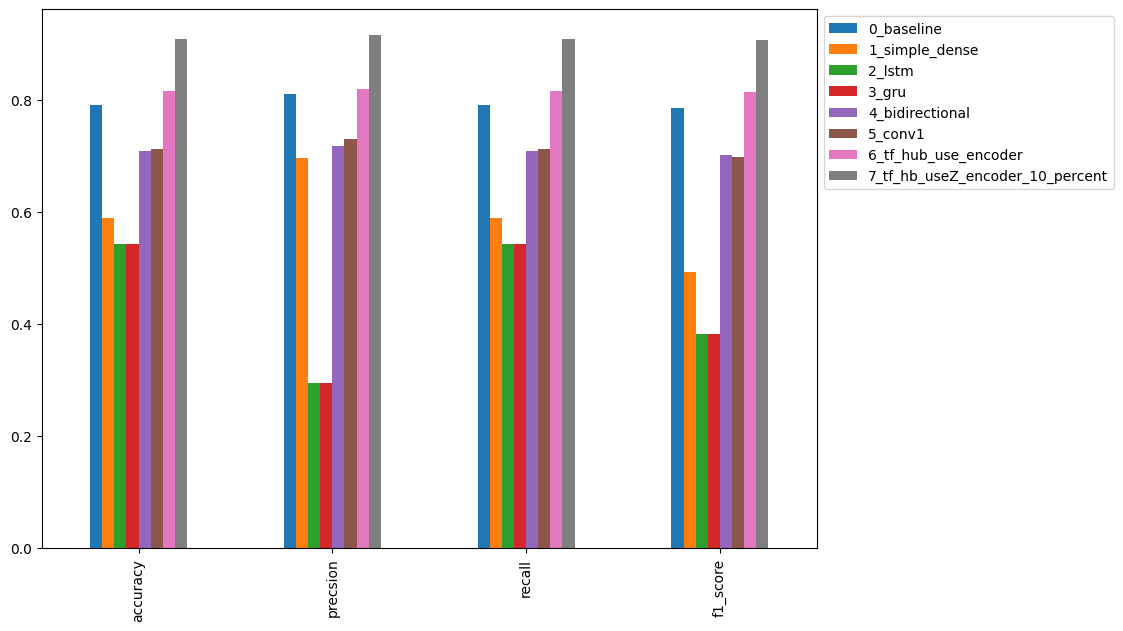

In [110]:
all_model_results.plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))